<a href="https://colab.research.google.com/github/Quang-Trong-Tan-Loc/AI/blob/main/BT5_Nutritional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

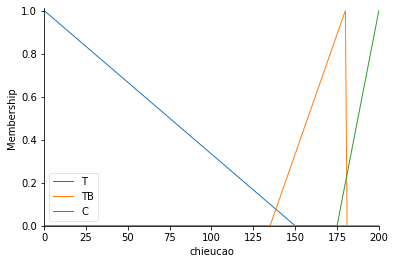

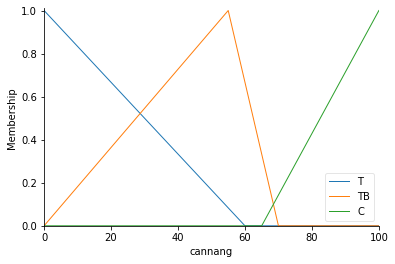

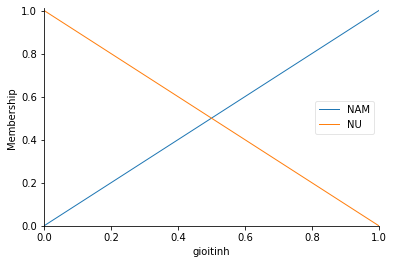

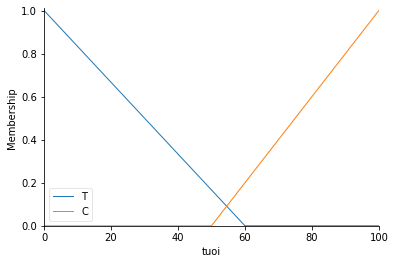

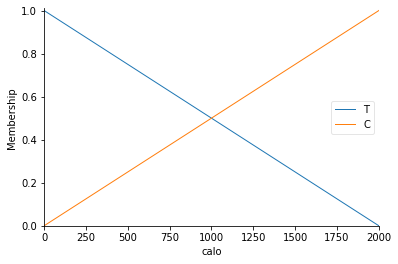

In [ ]:
from skfuzzy.control.fuzzyvariable import trimf
chieucao = ctrl.Antecedent(np.arange(0,201,1), 'chieucao')
cannang = ctrl.Antecedent(np.arange(0,101,1), 'cannang')
gioitinh = ctrl.Antecedent(np.arange(0,2,1), 'gioitinh')
tuoi = ctrl.Antecedent(np.arange(0,101,1), 'tuoi')
calo = ctrl.Consequent(np.arange(0,2001,1), 'calo')
chieucao['T']=fuzz.trimf(chieucao.universe, [0 ,0, 150])
chieucao['TB']=fuzz.trimf(chieucao.universe, [135 ,180, 180])
chieucao['C']=fuzz.trimf(chieucao.universe, [175 ,200, 200])
cannang['T']=fuzz.trimf(cannang.universe, [0 ,0, 60])
cannang['TB']=fuzz.trimf(cannang.universe, [0 ,55, 70])
cannang['C']=fuzz.trimf(cannang.universe, [65 ,100, 100])
tuoi['T']=fuzz.trimf(tuoi.universe, [0 ,0, 60])
tuoi['C']=fuzz.trimf(tuoi.universe, [50 ,100, 100])
gioitinh['NAM']=fuzz.trimf(gioitinh.universe, [0 ,1, 1])
gioitinh['NU']=fuzz.trimf(gioitinh.universe, [0 ,0, 1])
calo['T']=fuzz.trimf(calo.universe, [0 ,0, 2000])
calo['C']=fuzz.trimf(calo.universe, [0 ,2000, 2000])
chieucao.view()
cannang.view()
gioitinh.view()
tuoi.view()
calo.view()

In [ ]:
r1=ctrl.Rule((gioitinh['NAM']|gioitinh['NU'])&tuoi['T']&chieucao['T']&cannang['T'],calo['T'])
r2=ctrl.Rule((gioitinh['NAM']|gioitinh['NU'])&tuoi['T']&chieucao['T']&cannang['TB'],calo['C'])
r3=ctrl.Rule((gioitinh['NAM']|gioitinh['NU'])&tuoi['T']&chieucao['T']&cannang['C'],calo['C'])

r4=ctrl.Rule((gioitinh['NAM']|gioitinh['NU'])&tuoi['T']&chieucao['TB']&cannang['T'],calo['T'])
r5=ctrl.Rule((gioitinh['NAM']|gioitinh['NU'])&tuoi['T']&chieucao['TB']&cannang['TB'],calo['C'])
r6=ctrl.Rule((gioitinh['NAM']|gioitinh['NU'])&tuoi['T']&chieucao['TB']&cannang['C'],calo['C'])

r7=ctrl.Rule((gioitinh['NAM']|gioitinh['NU'])&tuoi['T']&chieucao['C']&cannang['T'],calo['C'])
r8=ctrl.Rule((gioitinh['NAM']|gioitinh['NU'])&tuoi['T']&chieucao['C']&cannang['TB'],calo['C'])
r9=ctrl.Rule((gioitinh['NAM']|gioitinh['NU'])&tuoi['T']&chieucao['C']&cannang['C'],calo['C'])

r10=ctrl.Rule((gioitinh['NAM']|gioitinh['NU'])&tuoi['C']&chieucao['T']&cannang['T'],calo['T'])
r11=ctrl.Rule((gioitinh['NAM']|gioitinh['NU'])&tuoi['C']&chieucao['T']&cannang['TB'],calo['T'])
r12=ctrl.Rule((gioitinh['NAM']|gioitinh['NU'])&tuoi['C']&chieucao['T']&cannang['C'],calo['C'])

r13=ctrl.Rule((gioitinh['NAM']|gioitinh['NU'])&tuoi['C']&chieucao['TB']&cannang['T'],calo['T'])
r14=ctrl.Rule((gioitinh['NAM']|gioitinh['NU'])&tuoi['C']&chieucao['TB']&cannang['TB'],calo['T'])
r15=ctrl.Rule((gioitinh['NAM']|gioitinh['NU'])&tuoi['C']&chieucao['TB']&cannang['C'],calo['C'])

r16=ctrl.Rule((gioitinh['NAM']|gioitinh['NU'])&tuoi['C']&chieucao['C']&cannang['T'],calo['T'])
r17=ctrl.Rule((gioitinh['NAM']|gioitinh['NU'])&tuoi['C']&chieucao['C']&cannang['TB'],calo['C'])
r18=ctrl.Rule((gioitinh['NAM']|gioitinh['NU'])&tuoi['C']&chieucao['C']&cannang['C'],calo['C'])

1105.8200322605323


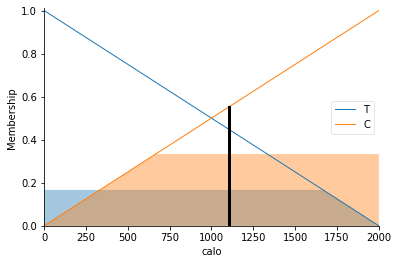

In [ ]:
calo_ctrl=ctrl.ControlSystem([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16,r17,r18])
calo1=ctrl.ControlSystemSimulation(calo_ctrl)
calo1.input['tuoi']=40
calo1.input['gioitinh']=0.9
calo1.input['chieucao']=170
calo1.input['cannang']=50
calo1.compute()
print(calo1.output['calo'])
calo.view(sim=calo1)